# Asistente musical
## Exploración y visualización de datos
### Extracción de Datos con Spotipy

Instalamos los paquetes

In [ ]:
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 32.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/work/trainingSongs_date_update.csv')
data

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,release_date,mood
0,0,0.357,0.425,5,-7.301,1,0.0333,0.5840,0.000000,0.3220,...,102.078,audio_features,4xqrdfXkTW4T0RauPLv3WA,spotify:track:4xqrdfXkTW4T0RauPLv3WA,https://api.spotify.com/v1/tracks/4xqrdfXkTW4T...,https://api.spotify.com/v1/audio-analysis/4xqr...,198040,3,2020-03-20,sad
1,1,0.557,0.442,5,-7.224,1,0.0243,0.7310,0.000015,0.1100,...,146.277,audio_features,75JFxkI2RXiU7L9VXzMkle,spotify:track:75JFxkI2RXiU7L9VXzMkle,https://api.spotify.com/v1/tracks/75JFxkI2RXiU...,https://api.spotify.com/v1/audio-analysis/75JF...,309600,4,2002-08-08,sad
2,2,0.652,0.557,1,-5.714,0,0.0318,0.7400,0.000000,0.1240,...,150.073,audio_features,2qxmye6gAegTMjLKEBoR3d,spotify:track:2qxmye6gAegTMjLKEBoR3d,https://api.spotify.com/v1/tracks/2qxmye6gAegT...,https://api.spotify.com/v1/audio-analysis/2qxm...,169354,4,2018-11-16,sad
3,3,0.681,0.372,5,-8.237,1,0.0432,0.6400,0.000000,0.1690,...,91.873,audio_features,1mXVgsBdtIVeCLJnSnmtdV,spotify:track:1mXVgsBdtIVeCLJnSnmtdV,https://api.spotify.com/v1/tracks/1mXVgsBdtIVe...,https://api.spotify.com/v1/audio-analysis/1mXV...,201000,4,2017-11-03,sad
4,4,0.367,0.111,4,-14.084,1,0.0972,0.9780,0.000040,0.0897,...,82.642,audio_features,43zdsphuZLzwA9k4DJhU0I,spotify:track:43zdsphuZLzwA9k4DJhU0I,https://api.spotify.com/v1/tracks/43zdsphuZLzw...,https://api.spotify.com/v1/audio-analysis/43zd...,196077,4,2019-03-29,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,1116,0.716,0.748,8,-6.060,1,0.0356,0.2350,0.849000,0.1140,...,119.918,audio_features,01kfSdF9zfcDLri5sSWEoL,spotify:track:01kfSdF9zfcDLri5sSWEoL,https://api.spotify.com/v1/tracks/01kfSdF9zfcD...,https://api.spotify.com/v1/audio-analysis/01kf...,169245,4,2022-03-18,energizer
1117,1117,0.778,0.786,3,-4.440,0,0.1150,0.0189,0.000047,0.0678,...,128.007,audio_features,7FvXYkiDWiLgXA9JHUf7Ni,spotify:track:7FvXYkiDWiLgXA9JHUf7Ni,https://api.spotify.com/v1/tracks/7FvXYkiDWiLg...,https://api.spotify.com/v1/audio-analysis/7FvX...,126562,4,2023-03-31,energizer
1118,1118,0.848,0.821,2,-5.408,0,0.0527,0.0169,0.000403,0.0962,...,125.051,audio_features,6GomT970rCOkKAyyrwJeZi,spotify:track:6GomT970rCOkKAyyrwJeZi,https://api.spotify.com/v1/tracks/6GomT970rCOk...,https://api.spotify.com/v1/audio-analysis/6Gom...,157445,4,2021-10-29,energizer
1119,1119,0.653,0.973,11,-3.894,1,0.0414,0.0338,0.006860,0.2990,...,128.024,audio_features,7wy8gxfen0STJ2jQMYQBAA,spotify:track:7wy8gxfen0STJ2jQMYQBAA,https://api.spotify.com/v1/tracks/7wy8gxfen0ST...,https://api.spotify.com/v1/audio-analysis/7wy8...,157573,4,2023-03-24,energizer


### Gestión de nulos

In [ ]:
# Comprobamos si hay valores nulos en el dataFrame
data.isnull().any()

Unnamed: 0          False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
type                False
id                  False
uri                 False
track_href          False
analysis_url        False
duration_ms         False
time_signature      False
release_date        False
mood                False
dtype: bool

**No hay valores nulos** en el DataFrame por lo tanto continuamos con la visualización de valores duplicados.

### Visualización de datos duplicados

**Mostramos** las columnas **duplicadas**



In [ ]:
# Filas duplicadas
filas_duplicadas_id = data[data.duplicated(subset='id', keep=False)].count()
print("Filas duplicadas en 'id':")
print(filas_duplicadas_id)

Filas duplicadas en 'id':
Unnamed: 0          137
danceability        137
energy              137
key                 137
loudness            137
mode                137
speechiness         137
acousticness        137
instrumentalness    137
liveness            137
valence             137
tempo               137
type                137
id                  137
uri                 137
track_href          137
analysis_url        137
duration_ms         137
time_signature      137
release_date        137
mood                137
dtype: int64


### Visualización de las Correlaciones entre las distintas columnas (previo al tratamiento de datos)

Vamos a observar en una **tabla** las correlaciones entre los valores de las columnas antes de ser tratadas.

In [ ]:
corr_data = data.corr()
corr_data

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Unnamed: 0,1.000000,0.128240,0.383978,0.058458,0.300223,-0.124325,0.157226,-0.342110,0.171917,0.198518,0.019789,0.165494,-0.214641,0.124520
danceability,0.128240,1.000000,0.261749,0.042869,0.209754,-0.074881,0.080974,-0.304552,0.077614,-0.068690,0.517601,-0.176350,-0.247776,0.223470
energy,0.383978,0.261749,1.000000,0.057754,0.808757,-0.191991,0.254916,-0.826278,0.062337,0.266145,0.356159,0.261545,-0.170135,0.169417
key,0.058458,0.042869,0.057754,1.000000,0.046892,-0.116006,-0.013424,-0.043907,0.027315,0.003244,0.019751,0.007715,-0.079267,0.005660
loudness,0.300223,0.209754,0.808757,0.046892,1.000000,-0.151280,0.179659,-0.674579,-0.143932,0.194093,0.292846,0.235943,-0.132021,0.167763
mode,-0.124325,-0.074881,-0.191991,-0.116006,-0.151280,1.000000,-0.072588,0.177333,-0.044204,-0.106726,0.011477,-0.063419,0.091800,-0.092795
speechiness,0.157226,0.080974,0.254916,-0.013424,0.179659,-0.072588,1.000000,-0.232934,-0.046340,0.183751,0.058788,0.117875,-0.101618,0.089677
acousticness,-0.342110,-0.304552,-0.826278,-0.043907,-0.674579,0.177333,-0.232934,1.000000,-0.064082,-0.156587,-0.285931,-0.211389,0.161525,-0.161211
instrumentalness,0.171917,0.077614,0.062337,0.027315,-0.143932,-0.044204,-0.046340,-0.064082,1.000000,-0.026379,-0.088560,0.030913,-0.082143,-0.010198
liveness,0.198518,-0.068690,0.266145,0.003244,0.194093,-0.106726,0.183751,-0.156587,-0.026379,1.000000,-0.009439,0.103631,-0.018481,0.025492


Visualizamos los datos en una **matriz de correlación gráfica** que nos será **más sencillo**.

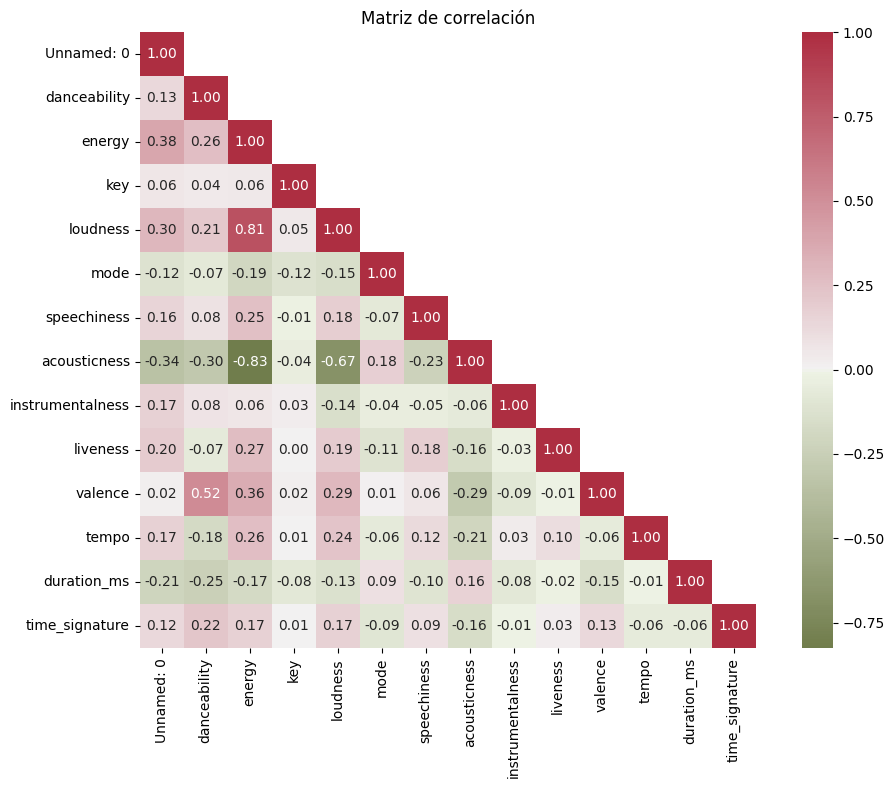

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Máscara para pasar los datos a valores de 0 a 1
mask = np.triu(np.ones_like(corr_data, dtype=bool), k=1)

# Paleta de colores
cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)

#Gráfica
plt.figure(figsize=(12,8))
sns.heatmap(corr_data, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.title('Matriz de correlación')
plt.show()

Podemos sacar los siguientes datos que pueden ser interesantes a la hora de sacar **conclusiones** para el entrenamiento del modelo.

Destacamos la correlación que existe entre las columnas:

- **loudness + energy** (81%): Con estos valores tenemos claro que existe **mucha complicidad** con los valores, cuando una canción tiene un **mayor volumen** existe **mayor posibilidad** de que esa canción se considere **enérgica**, éste dato es **fundamental** puesto que elegirá cuando una **canción es enérgica o** por lo contrario, es más **relajada**.

- **acousticness + energy** (-83%): Existe una correlación **fuerte negativa del 83%** entre `acousticness` y `energy`. Esto indica que, en general, cuando la **probabilidad** de que una canción sea **acústica** **aumenta**, la **intensidad y actividad** percibida de la **canción (energy)** tiende a **disminuir**. Resumiendo, hay una **tendencia** de que las **canciones más acústicas** tiendan a ser **menos energéticas**, y viceversa.

- **acousticness + loudness** (-67%): Sucede algo parecido a la anterior pues la probabilidad de que una canción sea **acústica** y al mismo tiempo tuviera **mucho volumen** es muy baja. Podemos decir que las canciones **más acústicas** tienen menor **volumen**.

- **valence + danceability** (53%): Como podemos ver, hay cierta complicidad en éstos valores, podemos decir que una canción más bailable, por lo general tendrá letras más positivas, éstos datos serán más interesantes a la hora de entrenando el modelo para decidir cuando una canción es feliz o triste.